# EDA

First step in the data science projects is data understanding, in this notebook we are going to use pandas to have a good look into the provided data

In [1]:
#import libraries
import os
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt
import seaborn as sns

import datetime


import boto3
import sagemaker
from sagemaker import get_execution_role


In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)

In [3]:

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()


# S3 bucket name
bucket = 'm5-forecasting-accuracy'


In [4]:
sales = pd.read_csv('s3://{}/{}'.format(bucket, 'sales_train_evaluation.csv'))

In [5]:
sales

id        item_id    dept_id   cat_id store_id state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  d_97  d_98  d_99  d_100  d_101  d_102  d_103  d_104  d_105  d_106  d_107  d_108  d_109  d_110  d_111  d_112  d_113  d_114  d_115  d_116  d_117  d_118  d_119  d_120  d_121  d_122  d_123  d_124  d_125  d_126  d_127  d_128  d_129  d_130  d_131  d_132  d_133  d_134  d_135  d_136  d_137  d_138  d_139  d_140  d_141  d_142  d_143  d_144  d_145  d_146  d_147  d_148  d_149  d_150  d_151  d_152  d_153  d_154  d_155  d_156  d_157  d_158  d_159  d_160  d_161  d_162  d_163  d_164  d_165  d_166  d_167  d_168  d_169  d_170  d_171  d_172  d_173  d_174  d_175  d_176  d_177  d_178  d_179  d_180  d_181  d_182  d_183  d_184  d_185  d_186  d_187  d_188  d_189  d_190  d_191  d_192  d_193  d_194  d_195  d_196  d_197  d_198  d_199  d_200  d_201  d_202  d_203  d_204  d_205  d_206  d_207  d_208  d_209  d_210  d_211  d_212  d_213  d_214  d_215  d_216  d_217  d_218  d_219  d_220  d_221  d_222  d_223  d_224  d_225  d_226  d_227  d_228  d_229  d_230  d_231  d_232  d_233  d_234  d_235  d_236  d_237  d_238  d_239  d_240  d_241  d_242  d_243  d_244  d_245  d_246  d_247  d_248  d_249  d_250  d_251  d_252  d_253  d_254  d_255  d_256  d_257  d_258  d_259  d_260  d_261  d_262  d_263  d_264  d_265  d_266  d_267  d_268  d_269  d_270  d_271  d_272  d_273  d_274  d_275  d_276  d_277  d_278  d_279  d_280  d_281  d_282  d_283  d_284  d_285  d_286  d_287  d_288  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0    0    0    0    0    0    0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0   
1      HOBBIES_1_002_CA_1_evalua

In [6]:
prices = pd.read_csv('s3://{}/{}'.format(bucket, 'sell_prices.csv'))

In [7]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [8]:
calendar = pd.read_csv('s3://{}/{}'.format(bucket, 'calendar.csv'))

In [9]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [11]:
nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
for feature in nan_features:
    calendar[feature].fillna('unknown', inplace = True)

In [12]:

cat = ['item_id','dept_id','cat_id','store_id','state_id']

numcols = [f"d_{day}" for day in range(1,1941)]

sales = pd.melt(sales, id_vars=cat, value_vars = numcols, var_name='d',value_name='demand')


In [13]:
sales = sales.merge(calendar,on='d')

In [14]:
sales = sales.merge(prices, on = ['store_id', 'item_id', 'wm_yr_wk'])

In [15]:
sales['d'] =  sales['d'].apply(lambda x: x.split('_')[1]).astype(np.int16)

In [16]:
sales['date'] = pd.to_datetime(sales['date'])

In [17]:
sales

,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1,12,2011-01-29,11101,Saturday,1,1,2011,unknown,unknown,unknown,unknown,0,0,0,0.46
1,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,2,15,2011-01-30,11101,Sunday,2,1,2011,unknown,unknown,unknown,unknown,0,0,0,0.46
2,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,3,0,2011-01-31,11101,Monday,3,1,2011,unknown,unknown,unknown,unknown,0,0,0,0.46
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,4,0,2011-02-01,11101,Tuesday,4,2,2011,unknown,unknown,unknown,unknown,1,1,0,0.46
4,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,5,0,2011-02-02,11101,Wednesday,5,2,2011,unknown,unknown,unknown,unknown,1,0,1,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46851182,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1940,1,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,2.98
46851183,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,1940,1,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,2.48
46851184,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1940,0,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,3.98
46851185,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,1940,1,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,1.28


In [18]:

data_dir = ''

sales.to_csv(os.path.join(data_dir, 'sales.csv'), index=False)

sales_location = sagemaker_session.upload_data(os.path.join(data_dir, 'sales.csv'))


In [19]:
sales_location

's3://sagemaker-us-west-2-479862333671/data/sales.csv'

In [20]:
sales = pd.read_csv(sales_location)

In [21]:
sales

,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,1,12,2011-01-29,11101,Saturday,1,1,2011,unknown,unknown,unknown,unknown,0,0,0,0.46
1,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,2,15,2011-01-30,11101,Sunday,2,1,2011,unknown,unknown,unknown,unknown,0,0,0,0.46
2,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,3,0,2011-01-31,11101,Monday,3,1,2011,unknown,unknown,unknown,unknown,0,0,0,0.46
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,4,0,2011-02-01,11101,Tuesday,4,2,2011,unknown,unknown,unknown,unknown,1,1,0,0.46
4,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,5,0,2011-02-02,11101,Wednesday,5,2,2011,unknown,unknown,unknown,unknown,1,0,1,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46851182,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1940,1,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,2.98
46851183,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,1940,1,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,2.48
46851184,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1940,0,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,3.98
46851185,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,1940,1,2016-05-21,11617,Saturday,1,5,2016,unknown,unknown,unknown,unknown,0,0,0,1.28


In [4]:
sales_location = 's3://sagemaker-us-west-2-479862333671/data/sales.csv'

In [ ]:
sales = pd.read_csv('sales_location')

In [22]:
state_sales = sales.groupby(['state_id','d'])['demand'].sum().reset_index()

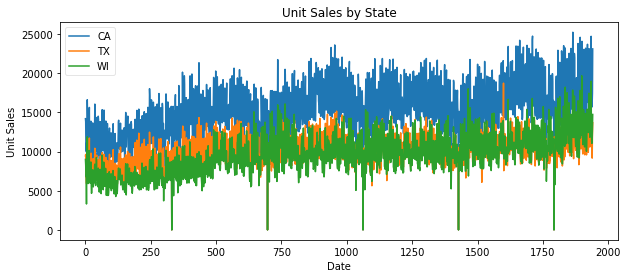

In [23]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in state_sales['state_id'].unique():
    ax.plot(state_sales[(state_sales['state_id']==i)]['d'], state_sales[(state_sales['state_id']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by State')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [67]:
store_sales = sales.groupby(['store_id','d'])['demand'].sum().reset_index()

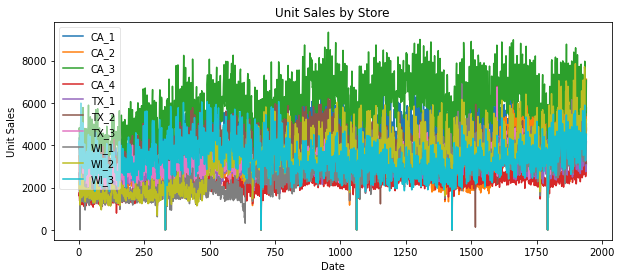

In [68]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in store_sales['store_id'].unique():
    ax.plot(store_sales[(store_sales['store_id']==i)]['d'], store_sales[(store_sales['store_id']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Store')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [69]:
cat_sales = sales.groupby(['cat_id','d'])['demand'].sum().reset_index()

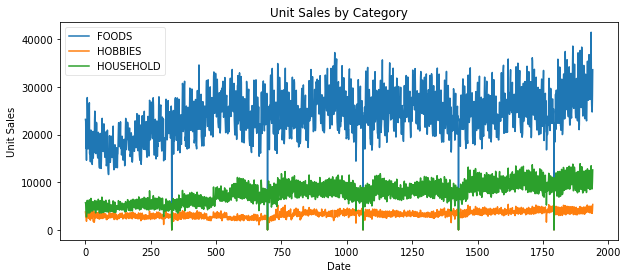

In [70]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in cat_sales['cat_id'].unique():
    ax.plot(cat_sales[(cat_sales['cat_id']==i)]['d'], cat_sales[(cat_sales['cat_id']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Category')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [71]:
dept_sales = sales.groupby(['dept_id','d'])['demand'].sum().reset_index()

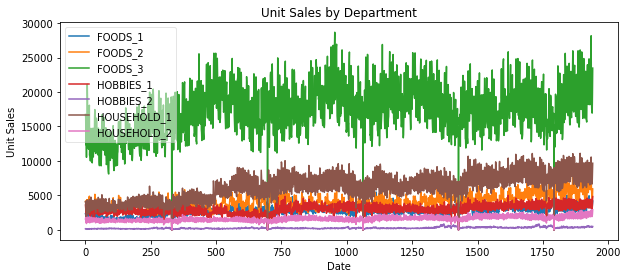

In [72]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in dept_sales['dept_id'].unique():
    ax.plot(dept_sales[(dept_sales['dept_id']==i)]['d'], dept_sales[(dept_sales['dept_id']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Department')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [73]:
event_1_sales = sales.groupby(['event_type_1','d'])['demand'].sum().reset_index()

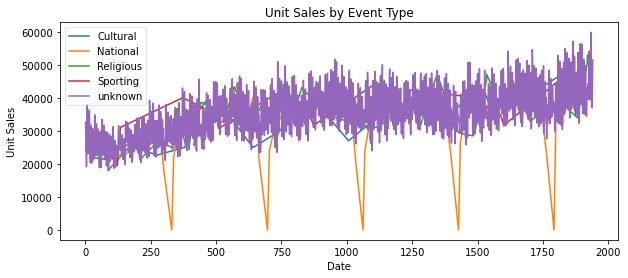

In [74]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in event_1_sales['event_type_1'].unique():
    ax.plot(event_1_sales[(event_1_sales['event_type_1']==i)]['d'], event_1_sales[(event_1_sales['event_type_1']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Event Type')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [75]:
event_2_sales = sales.groupby(['event_type_2','d'])['demand'].sum().reset_index()

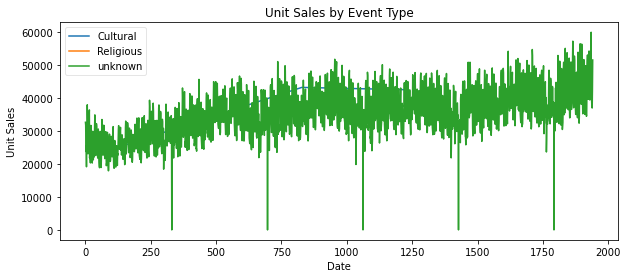

In [76]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in event_2_sales['event_type_2'].unique():
    ax.plot(event_2_sales[(event_2_sales['event_type_2']==i)]['d'], event_2_sales[(event_2_sales['event_type_2']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Event Type')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [77]:
year_sales = sales.groupby(['year','d'])['demand'].sum().reset_index()

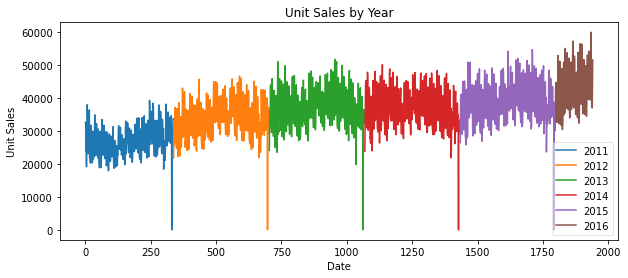

In [78]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in year_sales['year'].unique():
    ax.plot(year_sales[(year_sales['year']==i)]['d'], year_sales[(year_sales['year']==i)]['demand'], label=i)
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Year')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [79]:
wday_sales = sales.groupby(['wday','month'])['demand'].sum().reset_index()

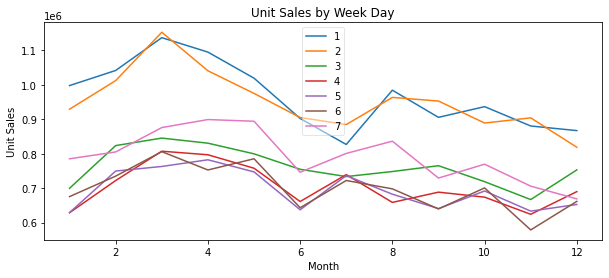

In [80]:
%matplotlib inline
fig = plt.figure(facecolor='w',figsize=(10,4))
ax = fig.add_subplot(111,axisbelow=True)
for i in wday_sales['wday'].unique():
    ax.plot(wday_sales[(wday_sales['wday']==i)]['month'], wday_sales[(wday_sales['wday']==i)]['demand'], label=i)
ax.set_xlabel('Month')
ax.set_ylabel('Unit Sales')
ax.set_title(label = 'Unit Sales by Week Day')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [81]:
sales_events = sales.groupby(['event_name_1', 'date'], as_index=False)['demand'].sum().groupby('event_name_1')['demand'].mean()

In [84]:
sales_all_dayofweek = sales.groupby(['wday', 'date'], as_index=False).sum().groupby(['wday'], as_index=False)['demand'].mean()

In [85]:
sales_all_dayofweek

,wday,demand
0,1,41706.269784
1,2,41256.996390
2,3,32994.931408
3,4,30500.483755
4,5,30130.418773
5,6,30321.039711
6,7,34357.472924


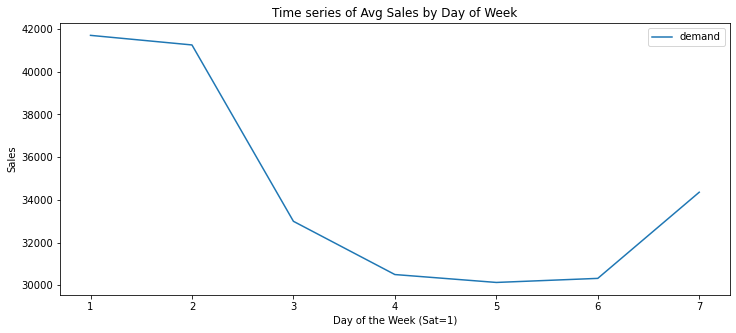

In [86]:
ax = plt.figure(figsize=(12, 5)).gca()
sales_all_dayofweek.plot(x='wday',y='demand', ax=ax)
ax.set_xlabel('Day of the Week (Sat=1)')
ax.set_ylabel('Sales')
ax.set_title('Time series of Avg Sales by Day of Week')
plt.show()


In [87]:
sales_all_month = sales.groupby(['month', 'date'], as_index=False).sum().groupby(['month'], as_index=False)['demand'].mean()

In [88]:
sales_all_month

,month,demand
0,1,33832.348101
1,2,34644.641176
2,3,34339.838710
3,4,34432.183333
4,5,33970.119318
5,6,35001.413333
6,7,35122.419355
7,8,35946.645161
8,9,35479.260000
9,10,34713.477419


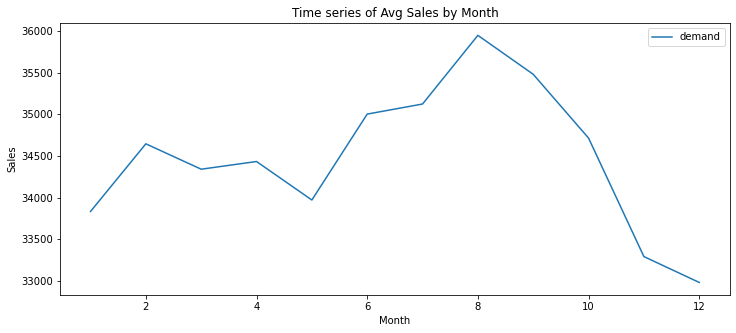

In [89]:
ax = plt.figure(figsize=(12, 5)).gca()
sales_all_month.plot(x='month',y='demand', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Time series of Avg Sales by Month')
plt.show()

In this notebook we made several plots to understand what data we have